In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import _pickle as cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

In [3]:
def get_vary(vary, h1, l_f, delta, i):
    return cPickle.load(open('results/bi_poo_vary_vary_{0}_h1_{1}_l_f_{2}_delta_{3}_i_{4}.p'.format(
        vary, h1, l_f, delta, i),'rb'))


vary_s       = [str(a) for a in ['alpha', 'beta', 'r_max']]
h1_s         = [str(a) for a in [False, True]]
l_f_s        = [str(a) for a in [1.0, 10.0]]
delta_s_vary = [str(a) for a in np.linspace(-60.0, 60.0, 31)]
i_s          = [str(a) for a in [0, 1, 2, 3, 4]]

params_vary = list(product(vary_s, h1_s, l_f_s, delta_s_vary, i_s))

data_vary = { tup:get_vary(*tup) for tup in params_vary }

In [4]:
def get_fit(h1, delta):
    return cPickle.load(open('results/bi_poo_fit_h1_{0}_delta_{1}.p'.format(h1, delta), 'rb'))


delta_s_fit = [str(a) for a in np.linspace(-100.0, 100.0, 101)]

params_fit = list(product(h1_s, delta_s_fit))
# (False, -100~100)
# (True,  -100~100)

data_fit = {tup:get_fit(*tup) for tup in params_fit}

In [6]:
bi_poo = np.loadtxt('./data/bi_poo_stdp_points.csv', delimiter=',')
print(len(bi_poo))

45


In [7]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

def plot_bi_poo():
    plt.scatter(-bi_poo[:,0],
                bi_poo[:,1],
                lw=0,
                c='#984ea3',
                s=40,
                zorder=-100)
    plt.plot([-100,100], [0,0],     'k--') # x axis
    plt.plot([0,0],      [-60,120], 'k--') # y axis
    plt.xlim([-100, 100])
    plt.ylim([-60,  120])

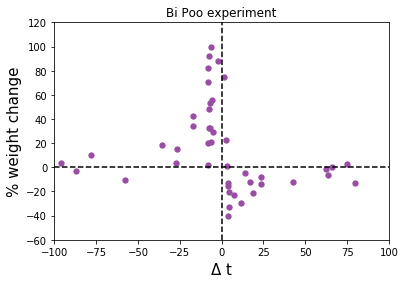

In [11]:
plot_bi_poo()
plt.title('Bi Poo experiment')
plt.xlabel('$\Delta$ t', fontsize=15)
plt.ylabel('% weight change', fontsize=15)
plt.show()

In [22]:
def plot_fit(h1):
    # h1 = True or False
    dws = np.zeros(len(delta_s_fit))
    for idx, delta in enumerate(delta_s_fit):
        p = (str(h1), delta)
        data = data_fit[p][0][0]
        dws[idx] = data.res['weights'][-1] / data.res['weights'][0]
    plt.plot([float(a) for a in delta_s_fit], 100 * dws-100)

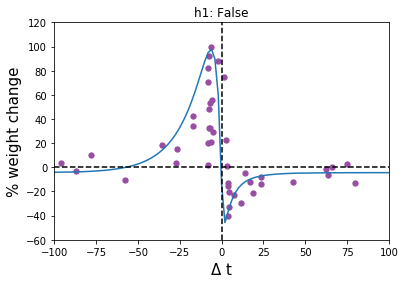

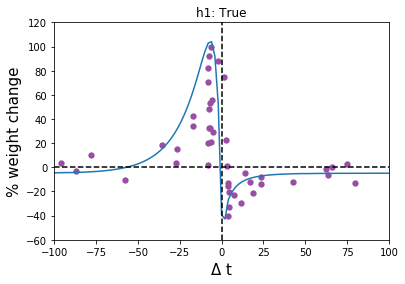

In [23]:
for h1 in h1_s:
    plt.figure()
    plot_fit(h1)
    plot_bi_poo()
    plt.xlabel('$\Delta$ t', fontsize=15)
    plt.ylabel('% weight change', fontsize=15)
    plt.title('h1: {0}'.format(h1))

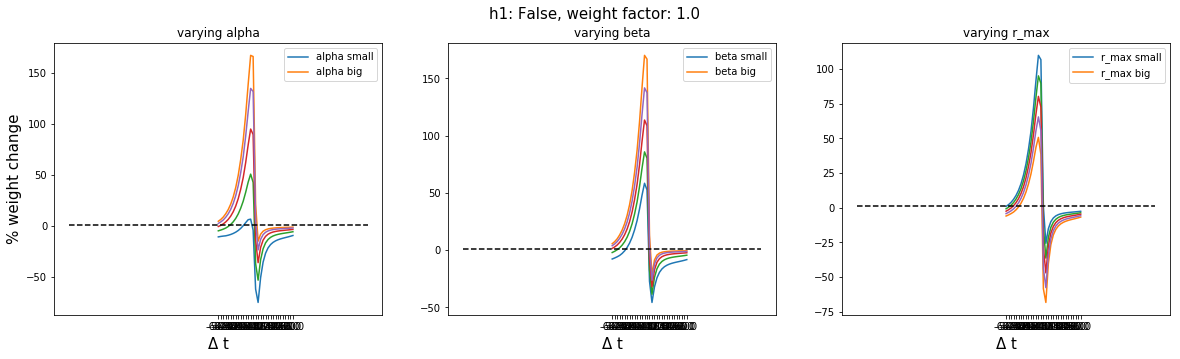

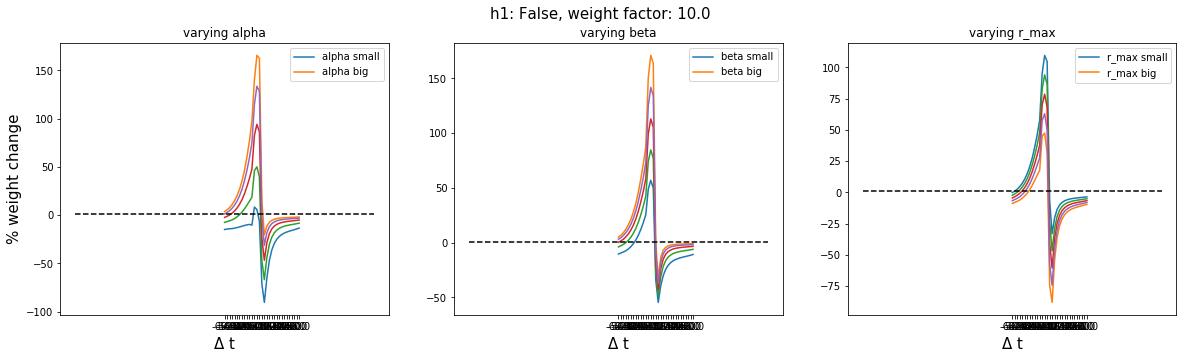

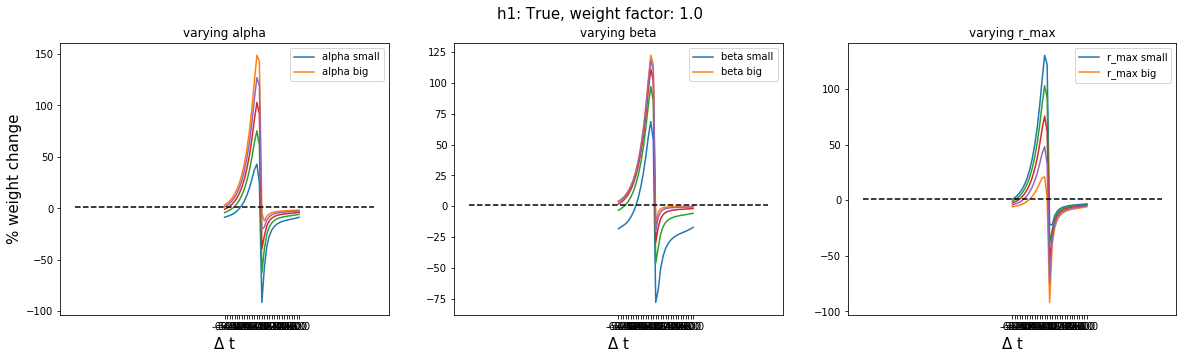

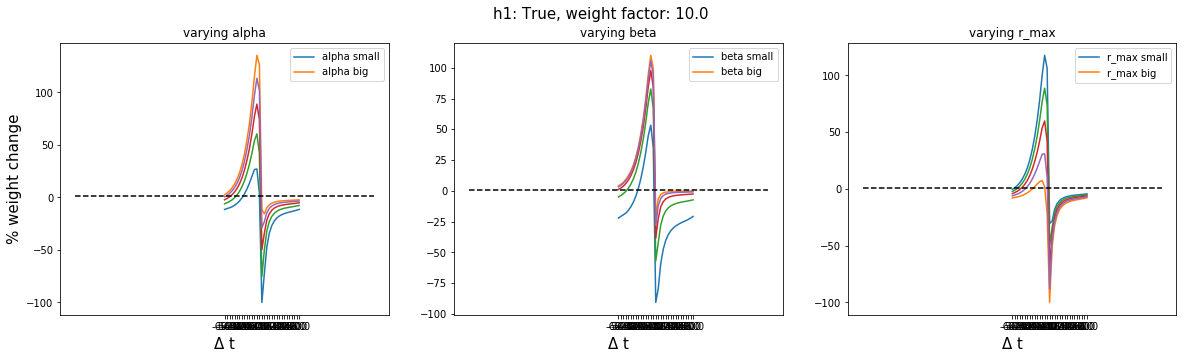

In [16]:
def show_plot(vary, h1, l_f):
    for i in [i_s[0], i_s[-1]] + i_s[1:-1]:
        dws = np.zeros(len(delta_s_vary))
        for idx, delta in enumerate(delta_s_vary):
            p = (vary, h1, l_f, delta, i)
            dws[idx] = data_vary[p][0][0].res['weights'][-1] / data_vary[p][0][0].res['weights'][0]
        plt.plot(delta_s_vary, 100*dws-100)
    plt.plot([-60, 60], [1.0, 1.0], 'k--')
    
for h1 in h1_s:
    for l_f in l_f_s:
        plt.figure(figsize=(20, 5))
        for i, vary in enumerate(vary_s):
            plt.subplot(1, 3, i+1)
            show_plot(vary, h1, l_f)
            plt.title('varying {0}'.format(vary))
            plt.xlabel('$\Delta$ t', fontsize=15)
            if i==0:
                plt.ylabel('% weight change', fontsize=15)
            plt.legend(['{0} small'.format(vary), '{0} big'.format(vary)])
        plt.suptitle('h1: {0}, weight factor: {1}'.format(h1, l_f), fontsize=15)